In [73]:
%matplotlib inline
%pip install import-ipynb
import sys
import torch
import torch_script as d2l

Note: you may need to restart the kernel to use updated packages.


In [40]:
from torch.distributions import multinomial
fair_probs = torch.ones(6) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [41]:
# 离散概率采样
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 3., 2., 0., 3., 2.])

In [42]:
# 硬币的公平性
multinomial.Multinomial(10, torch.tensor([0.5, 0.5])).sample()

tensor([4., 6.])

In [ ]:
# 采样100000次
multinomial.Multinomial(100000, fair_probs).sample()/100000

tensor([0.1663, 0.1671, 0.1669, 0.1646, 0.1681, 0.1671])

In [ ]:
counts = multinomial.Multinomial(10,fair_probs).sample((10,))
counts

tensor([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

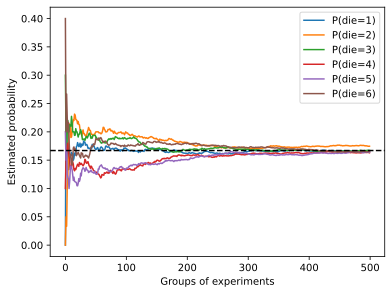

In [ ]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()